In [1]:
# Image processing imports
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_holes, remove_small_objects
from skimage.measure import label, regionprops, regionprops_table
from scipy.ndimage import binary_fill_holes
import imageio.v3 as iio
import pandas as pd
import numpy as np
import os 
import sys 
import matplotlib.pyplot as plt
import math
from scipy.ndimage import binary_fill_holes
from PIL import ImageFile

In [2]:

ImageFile.LOAD_TRUNCATED_IMAGES = True

# to make sure the computer doesnt think you are deploying a bomb 
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = 3019898880 

In [3]:
# Load the image
file_name = '../data/Sample_data/20250129_AlSi_multi.png'
img = iio.imread(file_name)


In [4]:

# Convert to grayscale if it's a color image
if img.ndim == 3:
    image_grayscale = rgb2gray(img)
else:
    image_grayscale = img

# Apply Otsu's thresholding to create a binary image
thresh = threshold_otsu(image_grayscale)
binary = image_grayscale > thresh

# Clean up the binary image by removing small objects and holes
removed_small_objects = remove_small_objects(binary, min_size=50)
tidy_image = remove_small_holes(removed_small_objects, area_threshold=50)


In [5]:

# Label the connected components
label_image = label(tidy_image)
regions = regionprops(label_image)

# Sort the regions by area in descending order
regions_sorted_by_area = sorted(regions, key=lambda r: r.area, reverse=True)

# Define how many of the largest regions you want to find
number_of_largest_features = 6

# Get the bounding boxes of the top N largest features
largest_features = regions_sorted_by_area[:number_of_largest_features]


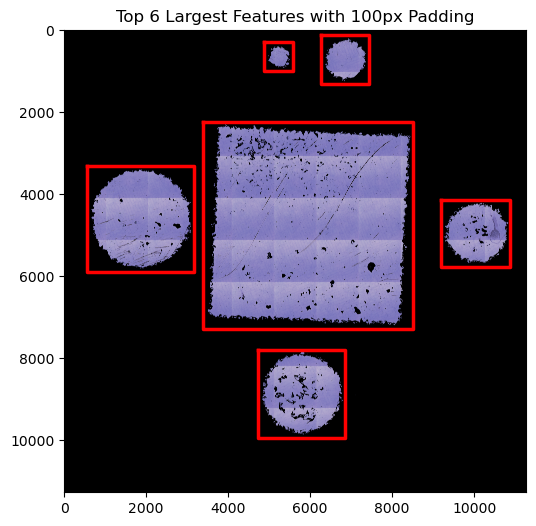

In [6]:
# Display the images
fig, axes = plt.subplots(1, figsize=(12, 6))

# Use the axes object for plotting
axes.imshow(img, cmap=plt.cm.gray) # Assuming 'img' is the original image you want to plot on

padding = 100# Define the padding in pixels



for feature in largest_features:

    label_no = feature.label
    minr, minc, maxr, maxc = feature.bbox
    
    # Calculate padded bounding box coordinates
    padded_minr = max(0, minr - padding)
    padded_minc = max(0, minc - padding)
    padded_maxr = min(img.shape[0], maxr + padding)
    padded_maxc = min(img.shape[1], maxc + padding)
    
    # Create the coordinates for the padded box
    bx = (padded_minc, padded_maxc, padded_maxc, padded_minc, padded_minc)
    by = (padded_minr, padded_minr, padded_maxr, padded_maxr, padded_minr)
    
    
    # Plot the padded bounding box on the image
    axes.plot(bx, by, '-r', linewidth=2.5) # Using red color to distinguish from the previous example



# Add title and show the plot
axes.set_title(f'Top {number_of_largest_features} Largest Features with {padding}px Padding')
plt.show()
    


In [15]:
# Save all the cropped areas 
feature_crop = []
crop_loc = []
# Loop through each feature to crop and display it
for i, feature in enumerate(largest_features):
    label_no = feature.label
    minr, minc, maxr, maxc = feature.bbox
    
    

    # Calculate padded bounding box coordinates
    padded_minr = max(0, minr - padding)
    padded_minc = max(0, minc - padding)
    padded_maxr = min(img.shape[0], maxr + padding)
    padded_maxc = min(img.shape[1], maxc + padding)
    
    # Crop the feature from the original image
    cropped_img = tidy_image[padded_minr:padded_maxr, padded_minc:padded_maxc]
    
    
    feature_crop.append((label_no,cropped_img))
    crop_loc.append((label_no,padded_minr,padded_maxr, padded_minc,padded_maxc))

In [16]:
crop_loc

[(76, 2225, 7279, 3395, 8517),
 (319, 3305, 5894, 567, 3169),
 (909, 7796, 9938, 4723, 6839),
 (408, 4127, 5774, 9182, 10875),
 (3, 120, 1307, 6258, 7441),
 (14, 293, 988, 4870, 5589)]

In [ ]:
# get the labels of the holes that lie within the bbox of the part
part_holes = []

for crop in crop_loc:
    part_name,min_x,max_x,min_, max_y = crop

    for r in regions:
        label_no_r = r.label
        minr_r, minc_r, maxr_r, maxc_R = r.bbox

        if minr_r < min_x and minc_r > max_x: 
            part_holes.append((part_name , label_no_r))
        


    


In [ ]:
# draw rectangles around the holes that belong in the part

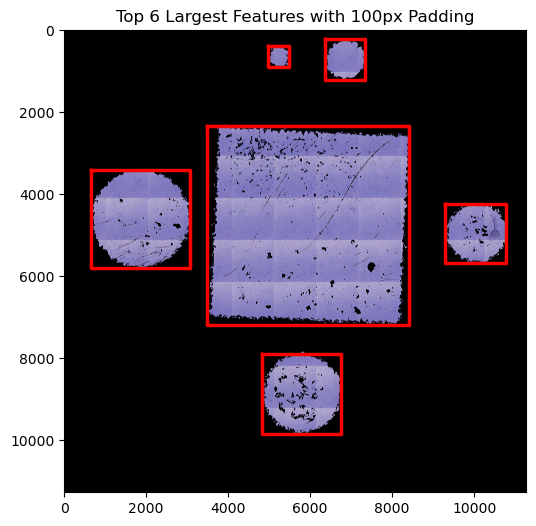

In [ ]:
# Display the images
fig, axes = plt.subplots(1, figsize=(12, 6))

# Use the axes object for plotting
axes.imshow(img, cmap=plt.cm.gray) # Assuming 'img' is the original image you want to plot on

for feature in largest_features:

    label_no = feature.label
    minr, minc, maxr, maxc = feature.bbox
    
    # Calculate padded bounding box coordinates
    padded_minr =  minr
    padded_minc = minc
    padded_maxr = min(img.shape[0], maxr + padding)
    padded_maxc = min(img.shape[1], maxc + padding)
    
    # Create the coordinates for the padded box
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    
    
    # Plot the padded bounding box on the image
    axes.plot(bx, by, '-r', linewidth=2.5) # Using red color to distinguish from the previous example



# show the plot

plt.show()
    

In [25]:
part_holes

[(76, 24),
 (76, 29),
 (76, 32),
 (76, 37),
 (76, 40),
 (76, 46),
 (76, 48),
 (319, 1),
 (319, 2),
 (319, 3),
 (319, 4),
 (319, 5),
 (319, 6),
 (319, 7),
 (319, 8),
 (319, 9),
 (319, 10),
 (319, 11),
 (319, 19),
 (319, 21),
 (319, 22),
 (319, 23),
 (319, 24),
 (319, 25),
 (319, 26),
 (319, 27),
 (319, 29),
 (319, 30),
 (319, 31),
 (319, 32),
 (319, 33),
 (319, 34),
 (319, 37),
 (319, 38),
 (319, 40),
 (319, 46),
 (319, 47),
 (319, 48),
 (319, 57),
 (319, 58),
 (319, 59),
 (319, 60),
 (319, 61),
 (319, 62),
 (319, 63),
 (319, 64),
 (319, 65),
 (319, 66),
 (319, 67),
 (319, 68),
 (319, 69),
 (319, 70),
 (319, 71),
 (319, 72),
 (319, 73),
 (319, 105),
 (319, 106),
 (319, 110),
 (319, 114),
 (319, 115),
 (319, 116),
 (319, 117),
 (319, 118),
 (319, 120),
 (319, 121),
 (319, 122),
 (319, 124),
 (319, 125),
 (319, 126),
 (319, 128),
 (319, 129),
 (319, 130),
 (319, 131),
 (319, 132),
 (319, 133),
 (319, 134),
 (319, 135),
 (319, 136),
 (319, 137),
 (319, 138),
 (319, 139),
 (319, 140),
 (319

In [73]:
feature_crop

[(76,
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])),
 (319,
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])),
 (909,
  array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
    

In [ ]:



a, b  = feature_crop[3]
filled_binary_img = binary_fill_holes(b)

96.00053919341222


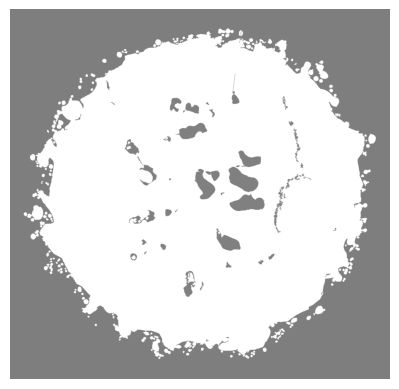

In [77]:
holes_mask = filled_binary_img != b
just_holes = np.invert(holes_mask)
labeled_holes = label(holes_mask)

props = regionprops_table(labeled_holes, properties=['area'])
data = pd.DataFrame(props)

sum_pores_px = data['area'].sum()
Total_Area = np.count_nonzero(filled_binary_img)
    
# Corrected porosity calculation to find the percentage of holes
percentage_porosity = (1 - (sum_pores_px / Total_Area)) * 100

# Create a simple figure to draw the original image and pores
fig, ax = plt.subplots()
ax.imshow(filled_binary_img, cmap=plt.cm.gray)

# Overlay the pores in a contrasting color (e.g., red)
ax.imshow(just_holes, cmap='grey', alpha=0.5)
ax.axis('off')

print(percentage_porosity)